## Information
* 본 문서는 Google Colab으로 작성되었습니다. Jupyter로 실행하려면, 데이터 셋의 경로 설정을 상황에 맞게 변경해야 함을 알려드립니다.
* 데이터셋은 git에 올리지 않았습니다. 해당 데이터 셋은 kaggle의 UTK-face 데이터셋에서 황인종 데이터만을 가져와 라벨링 후 사용하였습니다.
* 데이터 셋은 git에 올리지 않았으므로, gender dataset의 원본은 아래 링크를 확인해주세요!

* https://www.kaggle.com/jangedoo/utkface-new/code?datasetId=44109&sortBy=voteCount

## Import & Drive Mount

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import re
from PIL import Image

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
keras.__version__

'2.5.0'

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

In [ ]:
!unzip /content/drive/My\ Drive/[양재]\ 1조/dataset/gender_data.zip

Archive:  /content/drive/My Drive/[양재] 1조/dataset/gender_data.zip
  inflating: data/train/man/TM (1).jpg  
  inflating: data/train/man/TM (10).jpg  
  inflating: data/train/man/TM (100).jpg  
  inflating: data/train/man/TM (101).jpg  
  inflating: data/train/man/TM (102).jpg  
  inflating: data/train/man/TM (103).jpg  
  inflating: data/train/man/TM (104).jpg  
  inflating: data/train/man/TM (105).jpg  
  inflating: data/train/man/TM (106).jpg  
  inflating: data/train/man/TM (107).jpg  
  inflating: data/train/man/TM (108).jpg  
  inflating: data/train/man/TM (109).jpg  
  inflating: data/train/man/TM (11).jpg  
  inflating: data/train/man/TM (110).jpg  
  inflating: data/train/man/TM (111).jpg  
  inflating: data/train/man/TM (112).jpg  
  inflating: data/train/man/TM (113).jpg  
  inflating: data/train/man/TM (114).jpg  
  inflating: data/train/man/TM (115).jpg  
  inflating: data/train/man/TM (116).jpg  
  inflating: data/train/man/TM (117).jpg  
  inflating: data/train/man/TM (118

### data root 설정

In [ ]:
data_root_dir = 'data'
os.listdir(data_root_dir)

['train', 'valid']

In [ ]:
dir_names = [data_root_dir + child for child in ['/train/man', '/train/woman', '/valid/man', '/valid/woman']]

In [ ]:
#이미지를 gray scale로 변경
for dir_name in dir_names:
  for color_image in os.listdir(dir_name):
    im = Image.open(f'{dir_name}/{color_image}')
    im.convert('L').save(f'{dir_name}/{color_image}')

In [ ]:
# 확장자 명 확인
for check_dir in dir_names :
    print(f'- In "{check_dir}" directory : {os.listdir(check_dir)[:3]}')

- In "data/train/man" directory : ['20M.jpg', '627M.jpg', '692M.jpg']
- In "data/train/woman" directory : ['1581W.jpg', '925W.jpg', '1170W.jpg']
- In "data/valid/man" directory : ['1751M.jpg', '2009M.jpg', '1973M.jpg']
- In "data/valid/woman" directory : ['2445W.jpg', '2132W.jpg', '2100W.jpg']


In [ ]:
train_dir = data_root_dir + '/train'
valid_dir = data_root_dir + '/valid'

print(f'- Train Directory : {train_dir}')
print(f'- Valid Directory  : {valid_dir}')

- Train Directory : data/train
- Valid Directory  : data/valid


In [ ]:
#데이터 개수 확인
train_man_dir = train_dir + '/man'
train_woman_dir = train_dir + '/woman'
valid_man_dir = valid_dir + '/man'
valid_woman_dir = valid_dir + '/woman'

print('* Train man Data')
print(f'==> {len(os.listdir(train_man_dir))}')

print('\n* Train woman Data')
print(f'==> {len(os.listdir(train_woman_dir))}')

print('\n* Validation man Data')
print(f'==> {len(os.listdir(valid_man_dir))}')

print('\n* Validation woman Data')
print(f'==> {len(os.listdir(valid_woman_dir))}')

* Train man Data
==> 739

* Train woman Data
==> 971

* Validation man Data
==> 330

* Validation woman Data
==> 440


### Generate Data

In [ ]:
#이미지 증강
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1./255,
                               rotation_range=90,
                               width_shift_range = 0.2, 
                               height_shift_range = 0.2, 
                               shear_range = 0.2, 
                               zoom_range = 0.2, 
                               horizontal_flip = True,
                               brightness_range=[0.4,0.6],
                               fill_mode = 'nearest'
                               )


valid_gen = ImageDataGenerator(rescale = 1./255)


train_data = train_gen.flow_from_directory(train_dir,
                                           target_size = (200,200),
                                           batch_size = 100,
                                           class_mode = 'binary')

valid_data = valid_gen.flow_from_directory(valid_dir,
                                         target_size = (200,200),
                                         batch_size = 100,
                                         shuffle = False,
                                         class_mode = 'binary')

Found 1710 images belonging to 2 classes.
Found 770 images belonging to 2 classes.


In [ ]:
print(f'- Train data : {len(train_data):4d} batches')
print(f'- Valid data  : {len(valid_data):4d} batches')

- Train data :   18 batches
- Valid data  :    8 batches


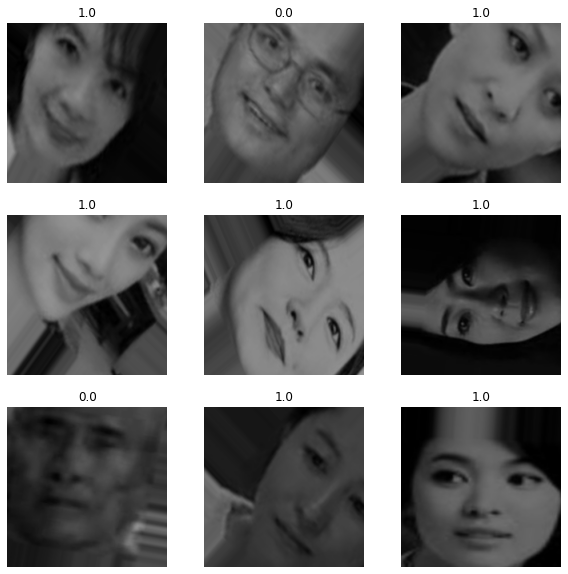

In [ ]:
#train data시각화 (0 : angry / 1 : happy / 2 : neutral / 3 : sad)
images = train_data[0][0][:9]
labels = train_data[0][1][:9]

plt.figure(figsize = (10,10))

for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis(False)

plt.show()

### test dataset


In [ ]:
!unzip /content/drive/My\ Drive/[양재]\ 1조/dataset/test.zip

Archive:  /content/drive/My Drive/[양재] 1조/dataset/test.zip
  inflating: test/남자청년.jpg   
  inflating: test/남자청소년.jpg  
  inflating: test/아저씨.jpg      
  inflating: test/아줌마.jpg      
  inflating: test/여자청년.jpg   
  inflating: test/여자청소년.jpg  
  inflating: test/할머니.jpg      
  inflating: test/할아버지.jpg   


## define function

### loss & accuracy visualization

In [ ]:
def draw_graph(hist):
  plt.figure(figsize = (16,6))
  #loss
  plt.subplot(1,2,1)
  plt.plot(hist.epoch, hist.history['loss'], label = 'Train')
  plt.plot(hist.epoch, hist.history['val_loss'], label = 'Valid')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Train & Valid Loss')
  plt.legend()
  #accuracy
  plt.subplot(1,2,2)
  plt.plot(hist.epoch, hist.history['accuracy'], label = 'Train')
  plt.plot(hist.epoch, hist.history['val_accuracy'], label = 'Valid')
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Train & Valid Accuracy')
  plt.legend()

  plt.show()

### evaluate test data

In [ ]:
#test 파일 리스트업하기
import os

path = 'test/'
file_list = os.listdir(path)

In [ ]:
import cv2

def sigmoid(x):
    return (1 / (1 +np.exp(-x))).astype(float)

def evaluate_testdata(model):

  plt.figure(figsize = (10, 16))

  for n in range(len(file_list)):
    # 랜덤 이미지 경로 추출 
    image_path = 'test/' + file_list[n]

    # 이미지 출력 
    plt.subplot(8 , 2, n * 2 + 1) 
    plt.imshow(plt.imread(image_path)) 
    plt.axis('off')

    # 예측값 출력 공간 
    plt.subplot(8 , 2 , n * 2 + 2)

    # 이미지 크기 변경 및 정규화 
    img = cv2.imread(image_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dsize = (200, 200)) 
    img = img / 255.0
    img = np.expand_dims(img, axis = 0)

    #이미지 분류 
    logits = model.predict(img)[0]
    logit = logits.tolist()[0]
    pred = [(1 - logit) * 100, logit * 100]
    label = ['man','woman']

    #막대그래프 색상 지정 
    colors = ['green','yellow']
    
    # 막대그래프 출력 
    y = np.arange(2)
    plt.barh(y, pred, color = colors)
    plt.yticks(y, label) 
  plt.show()

## VGG16

### Modeling

In [ ]:
from keras.applications.vgg16 import VGG16 
from keras import models, layers, optimizers, applications, regularizers

#학습순서
# test파일처럼 모델을 전체 재학습하여 가중치를 저장 => 이어서 앞부분 conv층 얼린 후 후반 layer만 unfreezing상태로 재학습 

#VGG16 기본모델 불러오기
base_model_VGG16 = VGG16(input_shape=(200, 200, 3),include_top=False)

#기본모델 layer 전체 unfreezing하여 재학습
for layer in base_model_VGG16.layers :
    layer.trainable = True

#DNN
model_V16 = models.Sequential()
model_V16.add(base_model_VGG16)
model_V16.add(layers.Flatten())
model_V16.add(layers.Dense(256, activation='relu'))
model_V16.add(layers.Dense(128, activation='relu'))
model_V16.add(layers.Dense(64, activation='relu'))
model_V16.add(layers.Dropout(0.4))
model_V16.add(layers.Dense(32, activation='relu'))
model_V16.add(layers.Dropout(0.4))
model_V16.add(layers.BatchNormalization())
model_V16.add(layers.Dense(1, activation  ='sigmoid'))

#1번 훈련 : test와 동일
model_V16.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000025),
              metrics = ['accuracy'])

hist_V16_base = model_V16.fit(train_data,
                              epochs = 50,
                              validation_data = valid_data)

#2번 훈련 : 마지막 층만 녹여서 훈련(finetuning)
for layer in model_V16.layers[0].layers :
    if layer.name.startswith('block5') : layer.trainable = True
    else : layer.trainable = False

model_V16.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000001),
              metrics = ['accuracy', 'Precision','Recall'])

hist_V16 = model_V16.fit(train_data,
                 epochs = 100,
                 validation_data = valid_data)

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/50
18/18 [==============================] - 41s 2s/step - loss: 0.8511 - accuracy: 0.5137 - val_loss: 0.6659 - val_accuracy: 0.6506
Epoch 2/50
18/18 [==============================] - 24s 1s/step - loss: 0.8064 - accuracy: 0.5333 - val_loss: 0.7406 - val_accuracy: 0.4286
Epoch 3/50
18/18 [==============================] - 24s 1s/step - loss: 0.8639 - accuracy: 0.4899 - val_loss: 0.7701 - val_accuracy: 0.4286
Epoch 4/50
18/18 [==============================] - 24s 1s/step - loss: 0.8819 - accuracy: 0.4784 - val_loss: 0.7226 - val_accuracy: 0.4286
Epoch 5/50
18/18 [==============================] - 24s 1s/step - loss: 0.8400 - accuracy: 0.5158 - val_loss: 0.6770 - val_accuracy: 0.5662
Epoch 6/50
18/18 [==============================] - 23s 1s/step - loss: 0.8026 - accuracy: 0.5110 - val_loss: 0.6404 - val_accuracy: 0.6636
Epoch 7/50
18/18 [==============================] - 23s 1s/step - loss: 0.7657 - accuracy: 0.55

### Evaluation

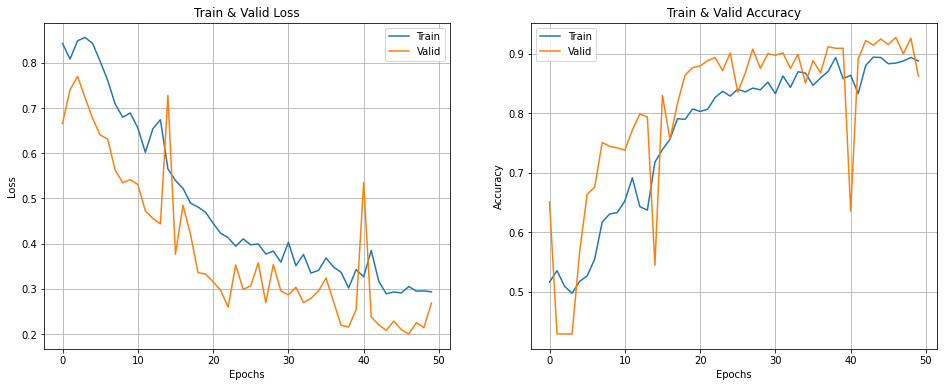

In [ ]:
## Loss & Accuracy : 1번훈련
draw_graph(hist_V16_base)

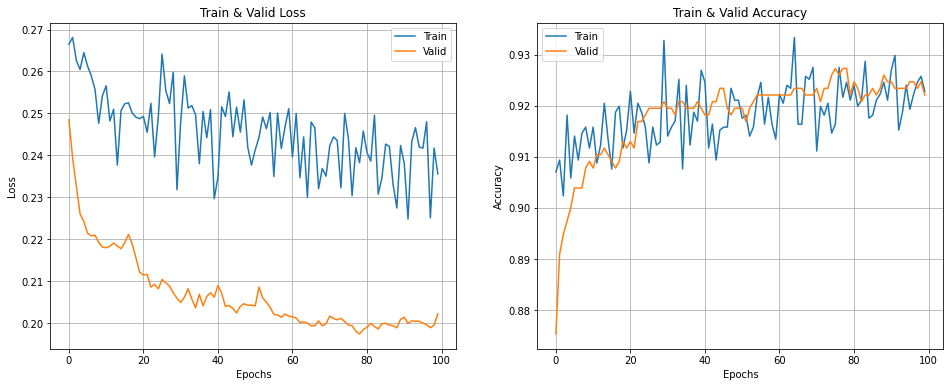

In [ ]:
## Loss & Accuracy : 2번훈련
draw_graph(hist_V16)

In [ ]:
loss_V16, acc_V16 , pre_V16, rec_V16 = model_V16.evaluate(valid_data)

#f1_score
f1_V16 = (2 * pre_V16 * rec_V16 / (pre_V16 + rec_V16))

print('\n* Loss')
print(f'==> {loss_V16:.5f}')

print('\n* Accuracy')
print(f'==> {acc_V16:.5f}')

print('\n* Precision')
print(f'==> {pre_V16:.5f}')

print('\n* Recall') 
print(f'==> {rec_V16:.5f}')

print('\n* F1 Score')
print(f'==> { f1_V16:.5f}')

8/8 [==============================] - 2s 166ms/step - loss: 0.1508 - accuracy: 0.9416 - precision: 0.9458 - recall: 0.9523

* Loss
==> 0.15076

* Accuracy
==> 0.94156

* Precision
==> 0.94582

* Recall
==> 0.95227

* F1 Score
==> 0.94904


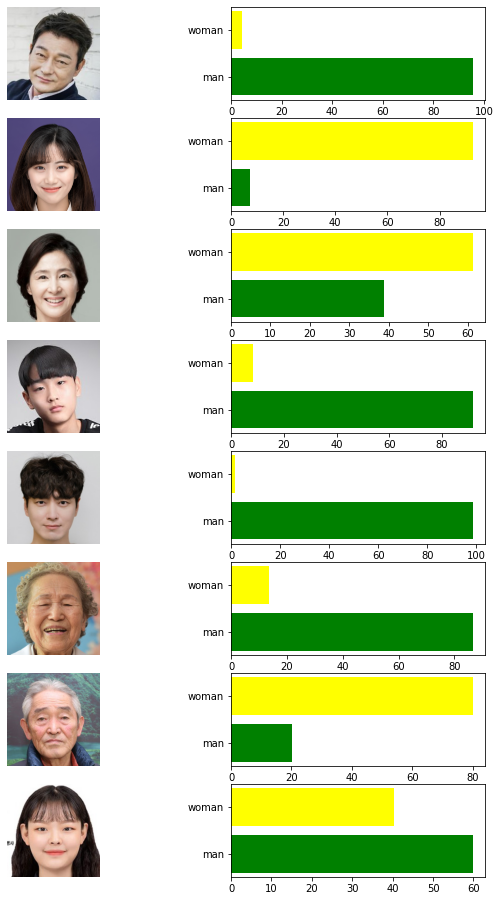

In [ ]:
evaluate_testdata(model_V16)

In [ ]:
#model_V16.save(f'/content/drive/My Drive/[양재] 1조/models/gender_V16.h5')

#model_V16_json = model_V16.to_json()
#with open(f'/content/drive/My Drive/[양재] 1조/models/gender_V16.json', 'w') as json_file : 
#    json_file.write(model_V16_json)

## VGG19

### Modeling

In [ ]:
from keras.applications.vgg19 import VGG19
from keras import models, layers, optimizers, applications, regularizers

#학습순서
# test파일처럼 모델을 전체 재학습하여 가중치를 저장 => 이어서 앞부분 conv층 얼린 후 후반 layer만 unfreezing상태로 재학습 

#VGG16 기본모델 불러오기
base_model_VGG19 = VGG19(input_shape=(200, 200, 3),
                         include_top=False)

#기본모델 layer 전체 unfreezing하여 재학습
for layer in base_model_VGG19.layers :
    layer.trainable = True

#DNN
model_V19 = models.Sequential()
model_V19.add(base_model_VGG19)
model_V19.add(layers.Flatten())
model_V19.add(layers.Dense(256, activation='relu'))
model_V19.add(layers.Dropout(0.4))
model_V19.add(layers.BatchNormalization())
model_V19.add(layers.Dense(128, activation='relu'))
model_V19.add(layers.Dense(1, activation  ='sigmoid'))

#1번 훈련 : test와 동일
model_V19.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000025),
              metrics = ['accuracy'])

hist_V19_base = model_V19.fit(train_data,
                              epochs = 50,
                              validation_data = valid_data)

#2번 훈련 : 마지막 층만 녹여서 훈련(finetuning)
for layer in model_V19.layers[0].layers :
    if layer.name.startswith('block5') : layer.trainable = True
    else : layer.trainable = False

model_V19.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000001),
              metrics = ['accuracy', 'Precision','Recall'])

hist_V19 = model_V19.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

Epoch 1/50
18/18 [==============================] - 28s 1s/step - loss: 0.7629 - accuracy: 0.5152 - val_loss: 0.6483 - val_accuracy: 0.6584
Epoch 2/50
18/18 [==============================] - 24s 1s/step - loss: 0.6636 - accuracy: 0.6003 - val_loss: 0.6014 - val_accuracy: 0.7130
Epoch 3/50
18/18 [==============================] - 24s 1s/step - loss: 0.5458 - accuracy: 0.7340 - val_loss: 0.5105 - val_accuracy: 0.7766
Epoch 4/50
18/18 [==============================] - 24s 1s/step - loss: 0.4767 - accuracy: 0.7957 - val_loss: 0.4744 - val_accuracy: 0.7597
Epoch 5/50
18/18 [==============================] - 24s 1s/step - loss: 0.4420 - accuracy: 0.7947 - val_loss: 0.4533 - val_accuracy: 0.7662
Epoch 6/50
18/18 [==============================] - 24s 1s/step - loss: 0.4130 - accuracy: 0.8346 - val_loss: 0.5499 - val_accuracy: 0.6727
Epoch 7/50
18/18 [==============================] - 24s 1s/step - loss: 0.3407 - accuracy: 0.8649 - val_loss: 0.5684 - val_accuracy: 0.6636
Epoch 8/50
18/18 [==

### Evaluation

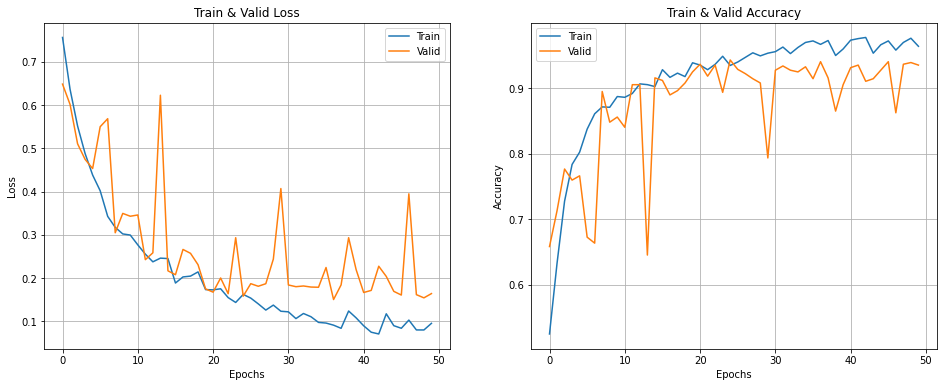

In [ ]:
## Loss & Accuracy : 1번훈련
draw_graph(hist_V19_base)

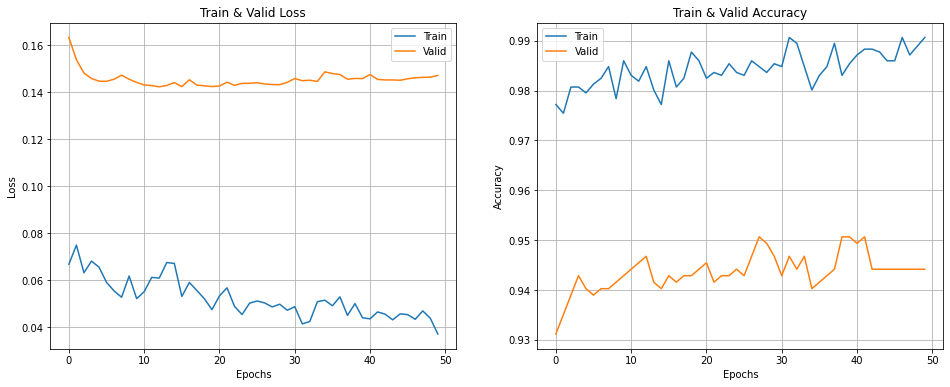

In [ ]:
## Loss & Accuracy : 2번훈련
draw_graph(hist_V19)

In [ ]:
loss_V19, acc_V19 , pre_V19, rec_V19 = model_V19.evaluate(valid_data)

#f1_score
f1_V19 = (2 * pre_V19 * rec_V19 / (pre_V19 + rec_V19))

print('\n* Loss')
print(f'==> {loss_V19:.5f}')

print('\n* Accuracy')
print(f'==> {acc_V19:.5f}')

print('\n* Precision')
print(f'==> {pre_V19:.5f}')

print('\n* Recall')
print(f'==> {rec_V19:.5f}')

print('\n* F1 Score')
print(f'==> { f1_V19:.5f}')

8/8 [==============================] - 13s 812ms/step - loss: 0.1471 - accuracy: 0.9442 - precision: 0.9481 - recall: 0.9545

* Loss
==> 0.14706

* Accuracy
==> 0.94416

* Precision
==> 0.94808

* Recall
==> 0.95455

* F1 Score
==> 0.95130


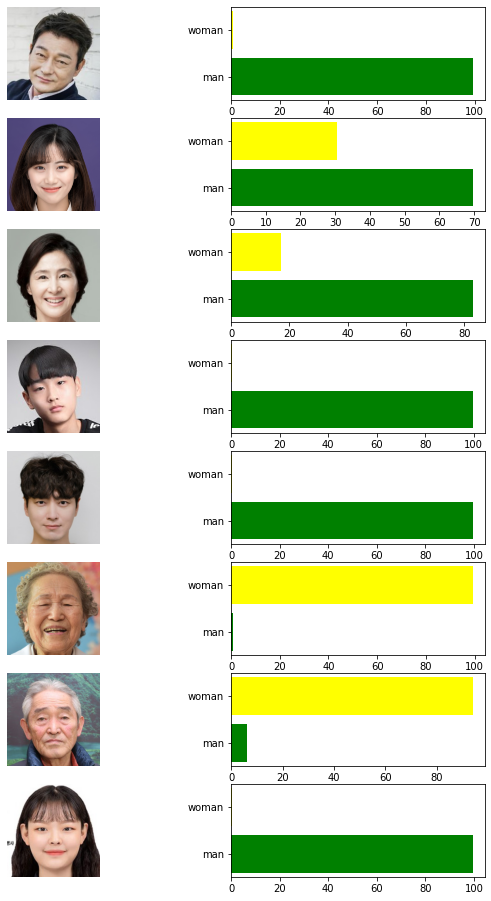

In [ ]:
evaluate_testdata(model_V19)

In [ ]:
#model_V19.save(f'/content/drive/My Drive/[양재] 1조/models/gender_V19.h5')
#
#model_V19_json = model_V19.to_json()
#with open(f'/content/drive/My Drive/[양재] 1조/models/gender_V19.json', 'w') as json_file : 
#    json_file.write(model_V19_json)

## ResNet50V2

### Modeling

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2
from keras import models, layers, optimizers, applications, regularizers

#학습순서
# test파일처럼 모델을 전체 재학습하여 가중치를 저장 => 이어서 앞부분 conv층 얼린 후 후반 layer만 unfreezing상태로 재학습 

#ResNet50V2 기본모델 불러오기
base_model_ResNet50V2 = ResNet50V2(input_shape=(200, 200, 3),include_top=False)

#기본모델 layer 전체 unfreezing하여 재학습
for layer in base_model_ResNet50V2.layers :
    layer.trainable = True

#DNN
model_R50V2 = models.Sequential()
model_R50V2.add(base_model_ResNet50V2)
model_R50V2.add(layers.Flatten())
model_R50V2.add(layers.Dense(256, activation='relu'))
model_R50V2.add(layers.Dense(128, activation='relu'))
model_R50V2.add(layers.Dense(64, activation='relu'))
model_R50V2.add(layers.Dropout(0.4))
model_R50V2.add(layers.Dense(32, activation='relu'))
model_R50V2.add(layers.Dropout(0.4))
model_R50V2.add(layers.BatchNormalization())
model_R50V2.add(layers.Dense(1, activation  ='sigmoid'))

#1번 훈련 : test와 동일
model_R50V2.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000025),
              metrics = ['accuracy'])

hist_R50V2_base = model_R50V2.fit(train_data,
                              epochs = 50,
                              validation_data = valid_data)

#2번 훈련 : 마지막 층만 녹여서 훈련(finetuning)
for layer in model_R50V2.layers[0].layers :
    if layer.name.startswith('conv5_block3') : layer.trainable = True
    else : layer.trainable = False

model_R50V2.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000001),
              metrics = ['accuracy', 'Precision','Recall'])

hist_R50V2 = model_R50V2.fit(train_data,
                 epochs = 50,
                 validation_data = valid_data)

### Evaluation

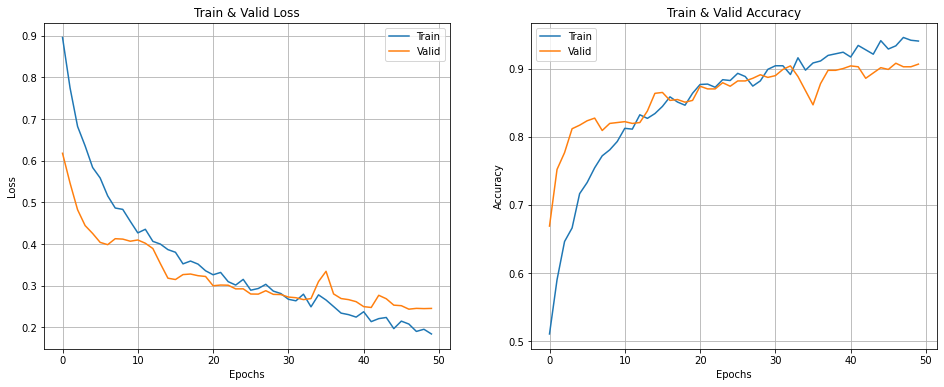

In [ ]:
## Loss & Accuracy : 1번훈련
draw_graph(hist_R50V2_base)

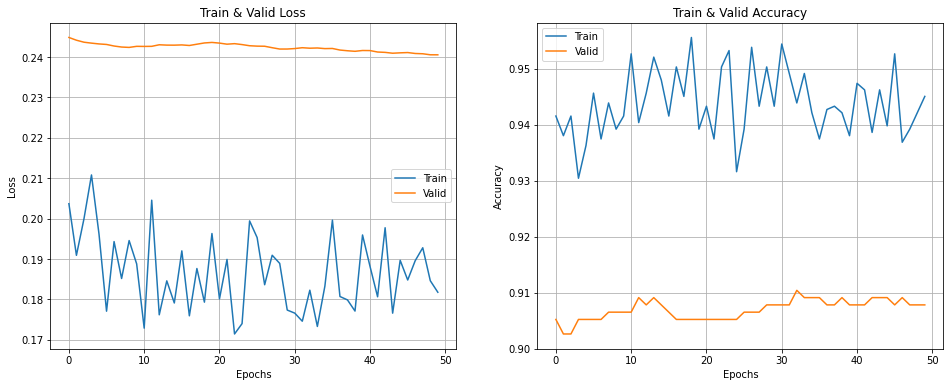

In [ ]:
## Loss & Accuracy : 2번훈련
draw_graph(hist_R50V2)

In [ ]:
loss_R50V2, acc_R50V2 , pre_R50V2, rec_R50V2 = model_R50V2.evaluate(valid_data)

#f1_score
f1 = (2 * pre_R50V2 * rec_R50V2 / (pre_R50V2 + rec_R50V2))

print('\n* Loss')
print(f'==> {loss_R50V2:.5f}')

print('\n* Accuracy')
print(f'==> {acc_R50V2:.5f}')

print('\n* Precision')
print(f'==> {pre_R50V2:.5f}')

print('\n* Recall')
print(f'==> {rec_R50V2:.5f}')

print('\n* F1 Score') 
print(f'==> { f1:.5f}')

8/8 [==============================] - 12s 197ms/step - loss: 0.2552 - accuracy: 0.9078 - precision: 0.9109 - recall: 0.9295

* Loss
==> 0.25522

* Accuracy
==> 0.90779

* Precision
==> 0.91091

* Recall
==> 0.92955

* F1 Score
==> 0.92014


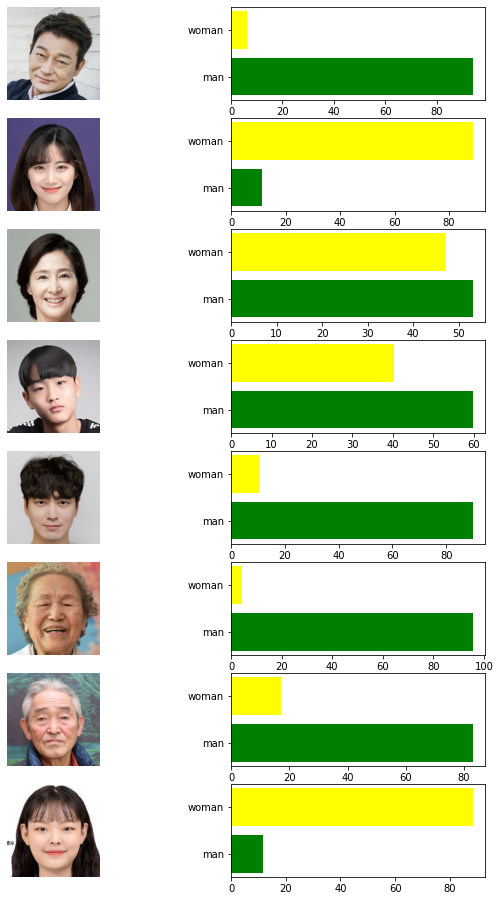

In [ ]:
evaluate_testdata(model_R50V2)

In [ ]:
#model_R50V2.save(f'/content/drive/My Drive/[양재] 1조/models/gender_R50V2.h5')

#model_R50V2_json = model_R50V2.to_json()
#with open(f'/content/drive/My Drive/[양재] 1조/models/gender_R50V2.json', 'w') as json_file : 
#    json_file.write(model_R50V2_json)

## Result


In [ ]:
import pandas as pd

result = pd.DataFrame(data = {'Name' : ['VGG16','VGG19','ResNet50V2'],
                              'Accuracy' : [acc_V16, acc_V19, acc_R50V2]})

result = result.sort_values(by = ['Accuracy'], ascending = False)
result

,Name,Accuracy
1,VGG19,0.944156
0,VGG16,0.941558
2,ResNet50V2,0.907792


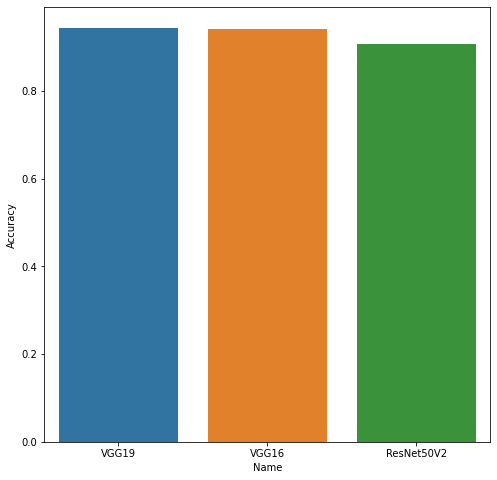

In [ ]:
#Accuracy 순위대로 표시
import seaborn as sns

plt.figure(figsize = (8,8))
sns.barplot(data = result, x = 'Name', y = 'Accuracy')

plt.show()